# Линейная регрессия
__Суммарное количество баллов: 10__

In [26]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [27]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [28]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуйте обе эти метрики.

In [29]:
from task import mse, r2

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [30]:
from task import NormalLR

In [31]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [32]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: None, R2: 0.9990352871987243


### Задание 3 (4 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [33]:
from task import GradientLR

In [34]:
def build_plot(X_train, y_train, X_test, y_test):
    xs = np.arange(0.0, 0.02, 0.0002)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.xlim(xs[0], xs[-1])
    plt.grid()
    plt.plot(xs, errors)
    plt.show()

In [35]:
X, y = generate_synthetic(1024)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/roman/edu/ML/Homework 3/task.py:42: RuntimeWarning: overflow encountered in matmul
  grad=2*(X.T @ (X @ weights - y))/X.shape[0] + self.reg_coef*np.sign(weights)
/home/roman/edu/ML/Homework 3/task.py:42: RuntimeWarning: overflow encountered in multiply
  grad=2*(X.T @ (X @ weights - y))/X.shape[0] + self.reg_coef*np.sign(weights)
/home/roman/edu/ML/Homework 3/task.py:42: RuntimeWarning: invalid value encountered in matmul
  grad=2*(X.T @ (X @ weights - y))/X.shape[0] + self.reg_coef*np.sign(weights)


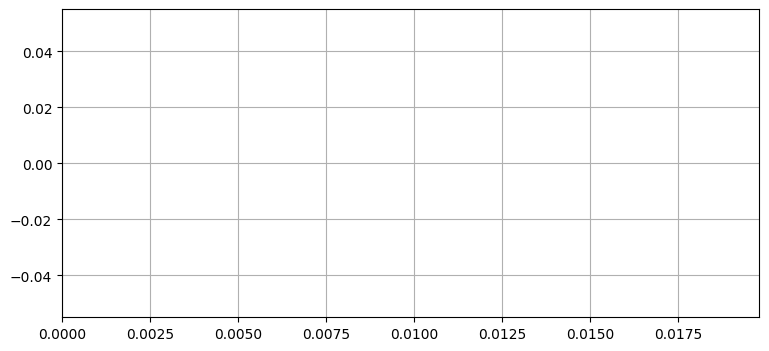

In [44]:
build_plot(X_train, y_train, X_val, y_val)

In [38]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: None, R2: 0.9980295015273282


### Задание 4 (2 балла)
Линейная регрессия является методом, который можно интерпретировать основываясь на значениях весов модели. Реализуйте метод, который будет упорядочивать признаки по их важности от наибольшей важности к наименьшей.

Обратите внимание, что такая интерпретация имеет смысл только если данные предварительно нормализованы, а также в признаках нет мультиколлинеарности (если используете обычную линейную регрессию).

#### Методы
`get_feature_importance` - метод, который вычисляет важность для каждого признака. Принимает на вход обученную линейную регрессию, возвращает список значений метрики важности признаков.

`get_most_important_features`- метод, который упорядочевает признаки по их важности в порядке убывания. Принимает на вход обученную линейную регрессию, возвращает упорядоченный список, состоящий из индексов признаков.

In [39]:
from task import get_feature_importance, get_most_important_features

In [40]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

[0.6935032809864459, 0.725145503608329, 1.35746940238759, 1.016801656756555, 0.16019612166098218, 0.5591569510161347]
[2, 3, 1, 0, 5, 4]


In [41]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

[0.6935032809864466, 0.7251455036083293, 1.3574694023875893, 1.0168016567565537, 0.1601961216609823, 0.5591569510161342]
[2, 3, 1, 0, 5, 4]


### Дополнительно
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [42]:
X, y = read_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=False)

In [43]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_test, y_val)}")

ValueError: operands could not be broadcast together with shapes (102,) (185,) 

In [ ]:
build_plot(X_train, y_train, X_val, y_val)

In [ ]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_test, y_val)}")

Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.